# Plot 3xs result as a function for PhT, for different z(in one plot, separate by color and offset) per Q2 bins

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import lhapdf
import sys
sys.path.insert(1,'/Users/sj400/Duke/sidis_project/calculate_xs')
import tmdlib.tmd_fit as tmd
print(sys.path)
import iminuit
from iminuit import Minuit
from iminuit.cost import LeastSquares

import get_weighted 

import lhapdf
import sys
sys.path.insert(1,'/Users/sj400/Duke/sidis_project/calculate_xs')
import tmdlib.tmd_fit as tmd
print(sys.path)
import iminuit
from iminuit import Minuit
from iminuit.cost import LeastSquares

import tmdlib.tmd_fit_witherr as tmd_err

LHAPDF 6.5.3 loading /opt/homebrew/Cellar/lhapdf/6.5.3/share/LHAPDF/CJ15lo/CJ15lo_0000.dat
['/Users/sj400/Duke/notebook/Unpol_proposal', '/Users/sj400/Duke/sidis_project/calculate_xs', '/opt/homebrew/Cellar/root/6.26.06_2/lib/root', '', '/opt/homebrew/Cellar/lhapdf/6.5.3/lib/python3.10/site-packages', '/Users/sj400/miniconda3/lib/python310.zip', '/Users/sj400/miniconda3/lib/python3.10', '/Users/sj400/miniconda3/lib/python3.10/lib-dynload', '/Users/sj400/miniconda3/lib/python3.10/site-packages']
CJ15lo PDF set, member #0, version 2; LHAPDF ID = 12300
LHAPDF 6.5.3 loading /opt/homebrew/Cellar/lhapdf/6.5.3/share/LHAPDF/DSSFFlo/DSSFFlo_0211.dat
DSSFFlo PDF set, member #211, version 1; LHAPDF ID = 90211
LHAPDF 6.5.3 loading /opt/homebrew/Cellar/lhapdf/6.5.3/share/LHAPDF/DSSFFlo/DSSFFlo_0321.dat
DSSFFlo PDF set, member #321, version 1; LHAPDF ID = 90321
['/Users/sj400/Duke/notebook/Unpol_proposal', '/Users/sj400/Duke/sidis_project/calculate_xs', '/Users/sj400/Duke/sidis_project/calculate_xs'

In [2]:
Factor_3xs=math.sqrt(5)

In [3]:
#for pim
#df_3xs_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/Shuo_Vlad_unpol_cs_results/default_3xs_2024/CS3xs_default_x1_stat0_pim_new.dat',delim_whitespace=True)
#for pip
df_3xs_x1_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/Shuo_Vlad_unpol_cs_results/default/CS_default_x1_stat0/CS_default_x1_stat0_pip.dat',delim_whitespace=True)
df_3xs_x1_zQ2xbjPhT.head()

,i,Ebeam,x,phih,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.103017,-2.844259,0.565646,0.322474,1.201749,0.081033,FUUT,0.208582,0.000938,0.0,0.0,neutron,pi+,solid,0.000938
1,1,11.0,0.118815,-2.832717,0.540861,0.323261,1.325817,0.072544,FUUT,0.184273,0.000955,0.0,0.0,neutron,pi+,solid,0.000955
2,2,11.0,0.131035,-2.829297,0.506799,0.323379,1.370059,0.068226,FUUT,0.179739,0.000998,0.0,0.0,neutron,pi+,solid,0.000998
3,3,11.0,0.146572,-2.827976,0.466217,0.323332,1.408901,0.066989,FUUT,0.176413,0.000956,0.0,0.0,neutron,pi+,solid,0.000956
4,4,11.0,0.169117,-2.823566,0.416780,0.323738,1.452023,0.063966,FUUT,0.171505,0.001224,0.0,0.0,neutron,pi+,solid,0.001224


In [4]:
PI = math.pi
print(PI)
#z_cuts=[0.3,0.4,0.5,0.6]
z_cuts=[0.3,0.35,0.4,0.45,0.5,0.55,0.6]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[1,1.5,2,2.5,3]
xbj_cuts=[0,0.25]
#PhT_cuts = [0,0.2]
#PhT_cuts = [0,0.2]
#PhT_cuts = [0,0.2,0.4,0.6,0.8]
PhT_cuts = [0,0.1,0.2,0.3,0.4,0.5]
#PhT_cuts=[0.2,0.6]
#PhT_cuts=[0.2,0.4]
#phih_bins = [-3.14,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3.14]
#phih_bins =[-PI,-3*PI/5,-2*PI/5,-PI/5,PI/5,2*PI/5,3*PI/5,4*PI/5,PI]
phih_bins =[-PI,-0.8*PI,-0.6*PI,-0.4*PI,-0.15*PI,0,0.15*PI,0.4*PI,0.6*PI,0.8*PI,PI]

df_3xs_zQ2=df_3xs_x1_zQ2xbjPhT[(df_3xs_x1_zQ2xbjPhT['Ebeam']==11)&(df_3xs_x1_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_zQ2xbjPhT['x']<xbj_cuts[1])]


3.141592653589793


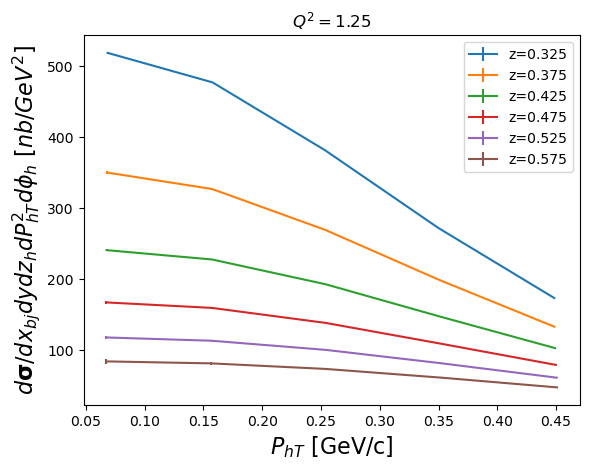

In [5]:
#plot for the Q2 bins
i_Q2=1

df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=[]
    Fuu_stats=[]
    pTs=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
        #print(len(df_3xs_PhT))
        
        _Fuu = get_weighted.Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Fuu_stat = Factor_3xs*get_weighted.Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
        _pT= get_weighted.Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        #print(_pT)
        Fuus.append(_Fuu)
        Fuu_stats.append(_Fuu_stat)
        pTs.append(_pT)
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
plt.legend()
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}d\phi_h}$ [$nb/GeV^2$]',fontsize=16)
plt.savefig('../Unpol_proposal/Materials/results/Fuu3xs_Pt_'+str(i_Q2)+'.pdf')

In [6]:
#numbers_1 3D bins for pi plus
#numbers_2 3D bins for pi minus
#numbers_3 2D bins for pi plus
#numbers_4 2D bins for pi minus
df_xuefei=pd.read_csv('xuefei/numbers_3.txt',names=['x','Q2','y','z','pT','phih','value','stat','sys'],header=None)
df_xuefei.head()

,x,Q2,y,z,pT,phih,value,stat,sys
0,0.164,1.5,0.825,0.48,0.360,3.11,26.34,1.50,1.6
1,0.164,1.5,0.825,0.48,0.378,3.11,24.07,1.30,1.6
2,0.164,1.5,0.825,0.48,0.391,3.11,20.47,1.00,1.4
3,0.164,1.5,0.825,0.48,0.404,3.11,19.32,0.98,1.4
4,0.164,1.5,0.825,0.48,0.416,3.11,18.93,0.96,1.3


0 0.308
1 0.336
2 0.381


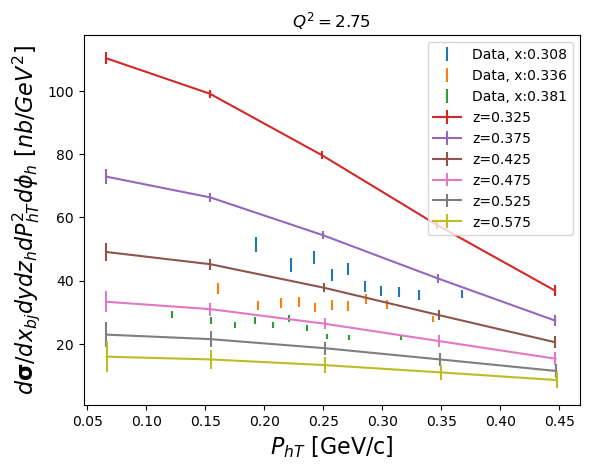

In [38]:
#plot for the Q2 bins
i_Q2=4
Factor_data=2*PI
df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<=Q2_cuts[i_Q2])]
df_xuefei_z=df_xuefei[(df_xuefei['Q2']>Q2_cuts[i_Q2-1])&(df_xuefei['Q2']<=Q2_cuts[i_Q2])]
xbjs=df_xuefei_z['x'].unique().tolist()
for i_xbj in range(0,len(xbjs)):
    print(i_xbj,xbjs[i_xbj])
    xbj=xbjs[i_xbj]
    df_xuefei_zx = df_xuefei_z[df_xuefei_z['x']==xbj]
    #plt.scatter(df_xuefei_zx['pT'],Factor_data*df_xuefei_zx['value'])
    plt.errorbar(df_xuefei_zx['pT'],Factor_data*df_xuefei_zx['value'],Factor_data*df_xuefei_zx['stat'],ls='none',label='Data, x:'+str(xbj))
factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    df_xf =df_xuefei_z[(df_xuefei_z['z']>z_cuts[i_z-1])&(df_xuefei_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=[]
    Fuu_stats=[]
    pTs=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
        #print(len(df_3xs_PhT))
        #df_xf_PhT=df_xf[(df_xf['pT']>PhT_cuts[i_PhT-1])&(df_xf['pT']<PhT_cuts[i_PhT])]
        _Fuu = get_weighted.Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Fuu_stat = Factor_3xs*get_weighted.Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
        _pT= get_weighted.Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        #print(_pT)
        Fuus.append(_Fuu)
        Fuu_stats.append(_Fuu_stat)
        pTs.append(_pT)
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    #plt.scatter(pTs,Fuus,edgecolor=color[i_z])
    plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')

    
plt.legend()
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}d\phi_h}$ [$nb/GeV^2$]',fontsize=16)
plt.savefig('../Unpol_proposal/Materials/results/Fuu3xs_xuefei_Pt_'+str(i_Q2)+'.pdf')

In [10]:
i_Q2=2
df_xuefei_z=df_xuefei[(df_xuefei['Q2']>Q2_cuts[i_Q2-1])&(df_xuefei['Q2']<Q2_cuts[i_Q2])]
df_xuefei_z.head()

,x,Q2,y,z,pT,phih,value,stat,sys
10,0.19,1.71,0.814,0.487,0.335,3.08,18.79,1.00,1.00
11,0.19,1.71,0.814,0.487,0.357,3.08,19.60,1.00,1.20
12,0.19,1.71,0.814,0.487,0.371,3.08,15.51,0.75,0.91
13,0.19,1.71,0.814,0.487,0.385,3.08,14.88,0.71,0.89
14,0.19,1.71,0.814,0.487,0.398,3.08,15.38,0.76,0.92
